## MODULE 2 ASSIGNMENT : Cross Validation
### By Aishwarya Deshmane

### Introduction:

The data consists of the vehicles details with its specifications and characteristics like engine_type, curb_weight, horsepower, rpm, mpg etc. These parameters are important to gain valuable insights

In this study, we will go through 2 models and find what parameters are correlated with the curb-weight using linear regression method

At the end, we can make that why that variables are one of the few important parameters to predict the curb_weight

The dataset consists of few problems:
- No column names
- Missing values
- Consistency issues

The approach to this study includes:
- Cleaning the data
- Preparing the data
- Finding correlation between the variables
- Splitting the data into train and test subsets
- Creating 2 models and finding the best one
- Conclusion

Import and load the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Read the dataset in github and assign the column names. Print the dataframe

In [2]:
data = 'https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/M2_Data.csv'
columns = ['symboling','normalized_loss','make', 'fuel_type','aspiration','no_of_doors','body_style',
           'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight',
           'engine_type','no_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio',
            'horsepower','peak_rpm','city_mpg','highway_mpg','price']
df = pd.read_csv(data, header = None, names = columns)

In [3]:
df

,symboling,normalized_loss,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


Replace the missing values with nan if any

In [4]:
df.replace('?',np.nan, inplace = True)
df

,symboling,normalized_loss,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


Check how many records in the data has null values

In [5]:
df.isna().sum()

symboling             0
normalized_loss      41
make                  0
fuel_type             0
aspiration            0
no_of_doors           2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
no_of_cylinders       0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Plot the heatmap to see the distribution of null values

<AxesSubplot:>

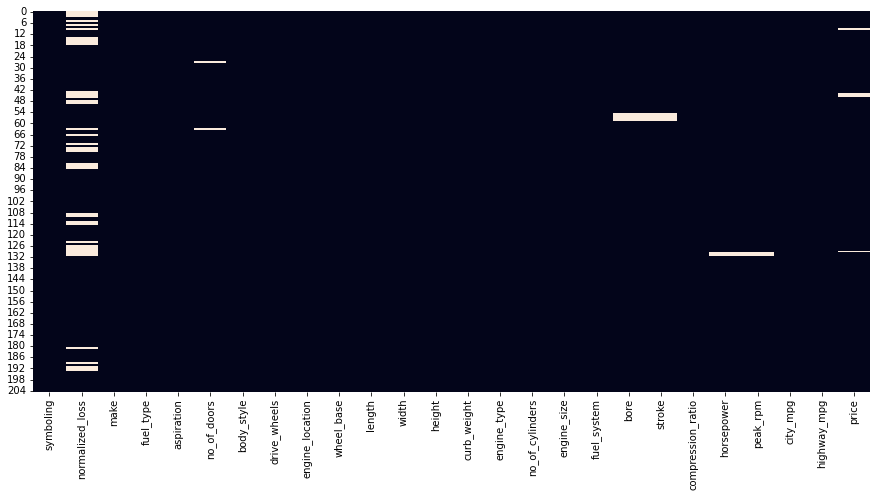

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),cbar=False)

Check how the data in columns with null values looks like and decide how the missing values can be found

In [7]:
df[['normalized_loss','no_of_doors','bore','stroke','horsepower','peak_rpm','price']].head(10)

,normalized_loss,no_of_doors,bore,stroke,horsepower,peak_rpm,price
0,NaN,two,3.47,2.68,111,5000,13495
1,NaN,two,3.47,2.68,111,5000,16500
2,NaN,two,2.68,3.47,154,5000,16500
3,164,four,3.19,3.4,102,5500,13950
4,164,four,3.19,3.4,115,5500,17450
5,NaN,two,3.19,3.4,110,5500,15250
6,158,four,3.19,3.4,110,5500,17710
7,NaN,four,3.19,3.4,110,5500,18920
8,158,four,3.13,3.4,140,5500,23875
9,NaN,two,3.13,3.4,160,5500,NaN


Consider all the columns with numeric datatype except price. Replace the null values with mean value of the respective column

In [8]:
missing_1 = df['normalized_loss'].astype(float).mean(axis = 0)
df['normalized_loss'].replace(np.nan,missing_1,inplace = True)

missing_2 = df['bore'].astype(float).mean(axis = 0)
df['bore'].replace(np.nan,missing_2,inplace = True)

missing_3 = df['stroke'].astype(float).mean(axis = 0)
df['stroke'].replace(np.nan,missing_3,inplace = True)

missing_4 = df['horsepower'].astype(float).mean(axis = 0)
df['horsepower'].replace(np.nan,missing_4,inplace = True)

missing_5 = df['peak_rpm'].astype(float).mean(axis = 0)
df['peak_rpm'].replace(np.nan,missing_5,inplace = True)

#missing_6 = df['price'].astype(float).mean(axis = 0)
#df['price'].replace(np.nan,missing_5,inplace = True)

Check the rows with number of doors null and count the rows with four and two number of doors. Most of the car has four doors. Replace the null values with four doors

In [9]:
df[df['no_of_doors'].isna()]

,symboling,normalized_loss,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [10]:
df['no_of_doors'].value_counts()

four    114
two      89
Name: no_of_doors, dtype: int64

In [11]:
df['no_of_doors'].replace(np.nan,'four',inplace = True)

In [12]:
df

,symboling,normalized_loss,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


Drop the rows with price value null and reset the index

In [13]:
df.dropna(subset =['price'],axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

Change the datatypes of the columns with the changes made

In [14]:
df[['normalized_loss','horsepower','peak_rpm']] = df[['normalized_loss','horsepower','peak_rpm']].astype(int)
df[['bore','stroke']] = df[['bore','stroke']].astype(float)

In [15]:
df

,symboling,normalized_loss,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Check if there are no null values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_loss    201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   no_of_doors        201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  no_of_cylinders    201 non-null    object 
 16  engine_size        201 non

Calculate the correlation between variables and plot the heatmap of the correlation of the data

In [17]:
df.corr()

,symboling,normalized_loss,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279739,-0.035527,0.036233
normalized_loss,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239544,-0.225016,-0.181877
wheel_base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360301,-0.470606,-0.543304
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285973,-0.665192,-0.698142
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245803,-0.633531,-0.680635
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309971,-0.049800,-0.104812
curb_weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279360,-0.749543,-0.794889
engine_size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256734,-0.650546,-0.679571
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267395,-0.582027,-0.591309
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063577,-0.033956,-0.034636


<AxesSubplot:>

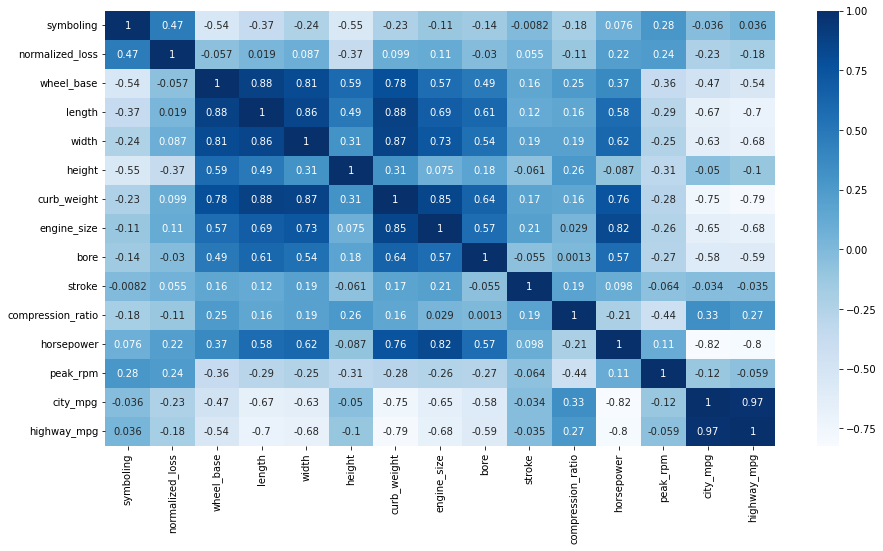

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Positive numbers has the positive covariance and negative numbers has the negative covariance

Considering only the curb_weight as it is response variable:

1. Symboling, peak_rpm, city_mpg and highway_mpg has the negative covariance and the remaining variables show positive covariance

2. Variables with correlation close to 1 are wheel_base, length, width, engine_size, horsepower. These are highly correlated and can be used as explanatory variables to predict the curb_weight

3. Variables with correlation close to -1 are city_mpg and highway_mpg and are highly inversely correlated. These too can be used as explanatory variables to predict the curb_weight


Our response variable is curb_weight

Curb_weight is the weight of the vehicle with fuel tank full and with all the standard equipments and amenities. Does not include passengers weight or any separately loaded items.

Assign the response variable to variable y and check the results once

In [19]:
y = df.curb_weight

In [20]:
y.head(10)

0    2548
1    2548
2    2823
3    2337
4    2824
5    2507
6    2844
7    2954
8    3086
9    2395
Name: curb_weight, dtype: int64

Make the copy of the dataframe and drop the curb_weight so that the response variable is removed from the explanatory variables

In [21]:
X = df.copy()

In [22]:
X.drop('curb_weight', axis=1, inplace=True)

In [23]:
X.head()

,symboling,normalized_loss,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now split the data into training and testing subsets and set aside 30% of the data for testing purposes. Remember to make sure you specify a value for the inital random_state to have the ability to reproduce the exact same training + testing subsets repeatedly

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 15)

Check the row indices of the training and testing datasets to see if they match

In [25]:
X_test.head()

,symboling,normalized_loss,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
49,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
191,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
12,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
172,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898
127,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104,5125,23,31,9895


In [26]:
y_test.head()

49     1905
191    3034
12     2765
172    2414
127    2460
Name: curb_weight, dtype: int64

In [27]:
X_train.head()

,symboling,normalized_loss,make,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
20,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572
169,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.70,92,4200,29,34,8948
137,0,102,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.50,82,4800,32,37,7126
181,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.00,85,5250,27,34,8195
11,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,20970


In [28]:
y_train.head()

20     1876
169    2326
137    2145
181    2212
11     2710
Name: curb_weight, dtype: int64

#### Model 1:
Create a new dataframe X_train_1 containing only the explanatory variables for the linear regression model

Consider the variables with high correlation. Using city_mpg, length and width as explanatory variables in model 1. Variables lengthe and width are positively correlated to the curb_weight, whereas city_mpg is inversely correlated

Do the sanity check

In [29]:
X_train_1 = X_train[['city_mpg','length','width']].copy()
X_train_1.head()

,city_mpg,length,width
20,37,157.3,63.8
169,29,175.6,66.5
137,32,172.0,65.4
181,27,171.7,65.5
11,21,176.8,64.8


Assing the model function you want to use to a variable

Fit the model using 5-fold cross validation; note how the 'model' variable created is used as a parameter for the cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' parameter

print out the R^2 metrics derived from the K-fold cross validation of our linear regression model

In [30]:
model = LinearRegression()

scores_1 = cross_val_score(model, X_train_1, y_train, cv=5)
print(scores_1)

[0.75816317 0.88379152 0.90933053 0.83067211 0.87025511]


In model 1, subsets with k value 2,3 and 5 has more accuracy than others. Subset with k value 1 has the least accuracy

Calculate the average R^2 across all 5 folds

In [31]:
np.mean(scores_1)

0.8504424879820931

The score is 0.850 and it calculated 85% of the values of response variables

#### Model 2:
Create a new dataframe X_train_2 containing other explanatory variables than model 1 for the linear regression

Consider the variables with high correlation. Using engine_size, horsepower and wheel_base as explanatory variables in model 2. All the three variables are positively correlated to the curb_weight

Do the sanity check

In [32]:
X_train_2 = X_train[['engine_size','horsepower','wheel_base']].copy()
X_train_2.head()

,engine_size,horsepower,wheel_base
20,90,68,93.7
169,122,92,102.4
137,108,82,97.2
181,109,85,97.3
11,164,121,101.2


Assing the model function and fit the model using 5-fold cross validation. Print the R^2 metrics derived from the K-fold cross validation

In [33]:
model = LinearRegression()
scores_2 = cross_val_score(model, X_train_2, y_train, cv=5)
print(scores_2)

[0.84746214 0.86551695 0.86495317 0.91802598 0.94975246]


In model 2, subsets with k value 4 and 5 has more accuracy than others

Calculate the average R^2 across all 5 folds

In [34]:
np.mean(scores_2)

0.8891421388276489

The score is 0.889 and it calculates 89% of the response variable values

### CONCLUSION:

- The score for model 1 is 85% and for model 2 is 89%

- Per this study, model 2 with explanatory variables engine_size, horsepower and wheel_base seems to have proper fit than model 1 to predict the response variable, curb_weight. This model can be used predict the curb_weight values

- More the engine_size, horsepower and wheel_base, more the curb_weight of the vehicle

- More trials with various combination can be tried to find a perfect fit with high R^2 score